# Import necessary libraries


In [1]:
from constants import *
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import TestDataset ,ImageDataset, get_ablu_transform, get_train_transform, get_test_transform, get_label_replacers, get_train_loader, get_test_loader
from models import get_densenet_121, get_resnet_152
from generate_submittion import generate_submit, get_empty_submit
from train import train, show_train_images
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image


# Prepare to train

In [2]:
# transforms
albu_transform = get_ablu_transform()
train_transform = get_train_transform()
val_transform = get_test_transform()

# get replacers
label2int, int2label = get_label_replacers(TRAIN_DATAFRAME_PATH)

# get train dataframe
data = pd.read_csv(TRAIN_DATAFRAME_PATH)
data.label = data.label.replace(label2int)

# split data on train and validation
train_df, valid_df = train_test_split(data, test_size=.15)

# create train and validation datasets
train_dataset = ImageDataset(train_df, FOLDER_PATH, train_transform, albu_transform)
val_dataset = ImageDataset(valid_df, FOLDER_PATH, val_transform)

# create train and validation loaders
train_loader = get_train_loader(train_dataset)
val_loader = get_test_loader(val_dataset)

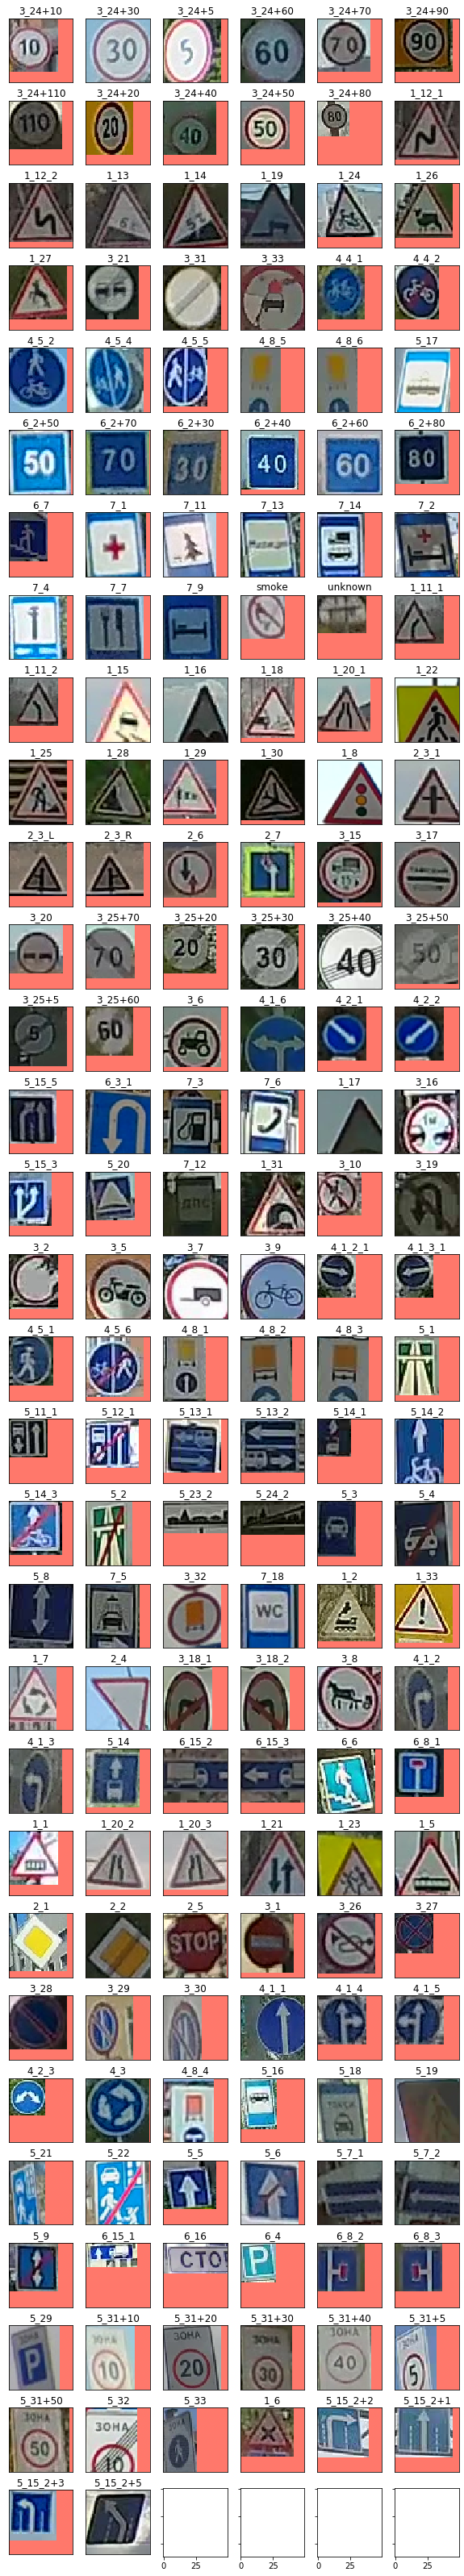

In [3]:
show_train_images()

# Upload models

In [4]:
device = torch.device('cuda')
model = get_densenet_121(device)

lr = 0.0001

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr)
shed = torch.optim.lr_scheduler.StepLR(opt, 4)


f1_train 0.8709422011084719
f1_test 0.9927641099855282


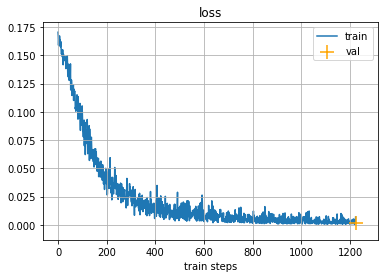

Train loss: 2.3921590296320994
Val loss: 0.13145621330915327
Train acc: tensor(87.0942, device='cuda:0')
Val acc: tensor(99.2764, device='cuda:0')


In [5]:
train(model, loss_fn, opt, train_loader, val_loader, 1, device, '../checkpoints/conda_dense.ckpt' ,shed)

In [6]:
# prepare dataframe
zero = get_empty_submit(SAMPLE_SUBMISSION_PATH)

# create dataset and loader
test_dataset = TestDataset(zero, FOLDER_PATH, val_transform)
test_loader = get_test_loader(test_dataset)

# upload first model
model = get_resnet_152(DEVICE, '../checkpoints/resnet.ckpt')

# upload second model
model2 = get_densenet_121(DEVICE, '../checkpoints/densenet121(99.9796_99.9566).ckpt')

8a4eef8e-991c-4a08-9bc4-5c88517bfbc9.png             tensor(1.3243, device='cuda:0')    tensor([126, 128, 145, 176, 172], device='cuda:0')
8a4eef8e-991c-4a08-9bc4-5c88517bfbc9.png             tensor(5.3622, device='cuda:0')    tensor([126, 150, 178,  27,  14], device='cuda:0')


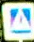

314b946b-b8e6-495e-a8ce-464271660b34.png             tensor(4.4129, device='cuda:0')    tensor([181,  31, 161, 176, 173], device='cuda:0')
314b946b-b8e6-495e-a8ce-464271660b34.png             tensor(1.6757, device='cuda:0')    tensor([126, 176,  27, 181, 117], device='cuda:0')


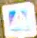

2527a4ae-4d64-4624-8aee-e553369f36d7.png             tensor(3.1442, device='cuda:0')    tensor([126, 162, 163, 121, 120], device='cuda:0')
2527a4ae-4d64-4624-8aee-e553369f36d7.png             tensor(2.8868, device='cuda:0')    tensor([163,  14, 122, 126, 160], device='cuda:0')


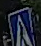

394759c0-68c7-42ef-8847-eca4a4970473.png             tensor(0.2666, device='cuda:0')    tensor([121, 162, 163, 181, 151], device='cuda:0')
394759c0-68c7-42ef-8847-eca4a4970473.png             tensor(1.8779, device='cuda:0')    tensor([163, 151, 126, 112, 111], device='cuda:0')


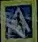

69f53dc2-e711-4f14-b1cc-8f436f24495d.png             tensor(0.1546, device='cuda:0')    tensor([128,   9,   8, 105, 181], device='cuda:0')
69f53dc2-e711-4f14-b1cc-8f436f24495d.png             tensor(4.8734, device='cuda:0')    tensor([128,   9, 176,  32, 181], device='cuda:0')


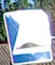

ba0b2a75-0e6a-41da-bb9a-e87c5dc84569.png             tensor(0.4263, device='cuda:0')    tensor([  6, 181,  18,  75,   9], device='cuda:0')
ba0b2a75-0e6a-41da-bb9a-e87c5dc84569.png             tensor(1.0373, device='cuda:0')    tensor([181,  21, 162,  18, 141], device='cuda:0')


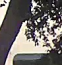

f26ea40d-77a4-43bb-bbb9-806166e8eb08.png             tensor(0.5571, device='cuda:0')    tensor([181,   9,  76,  44, 175], device='cuda:0')
f26ea40d-77a4-43bb-bbb9-806166e8eb08.png             tensor(4.0350, device='cuda:0')    tensor([181,  46,  47,  31,   1], device='cuda:0')


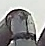

129816d1-a144-47fb-951b-ce338aee5bdf.png             tensor(1.2900, device='cuda:0')    tensor([  5, 169, 137, 181, 124], device='cuda:0')
129816d1-a144-47fb-951b-ce338aee5bdf.png             tensor(0.3086, device='cuda:0')    tensor([172, 181, 137, 141, 180], device='cuda:0')


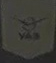

52e29c09-428a-4f92-9494-516738ebe014.png             tensor(0.2741, device='cuda:0')    tensor([137, 138, 136, 140, 181], device='cuda:0')
52e29c09-428a-4f92-9494-516738ebe014.png             tensor(2.5084, device='cuda:0')    tensor([181, 141, 173, 172, 180], device='cuda:0')


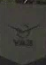

f92eb955-ff3f-468c-81d7-761040eb4b64.png             tensor(2.4341, device='cuda:0')    tensor([  6,  24,  75,   0, 181], device='cuda:0')
f92eb955-ff3f-468c-81d7-761040eb4b64.png             tensor(1.5624, device='cuda:0')    tensor([ 75, 181,   0,  23,  36], device='cuda:0')


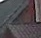

5c3c873a-6d0b-401f-8b26-67fae088c830.png             tensor(3.4381, device='cuda:0')    tensor([181,  75,  83,   9, 175], device='cuda:0')
5c3c873a-6d0b-401f-8b26-67fae088c830.png             tensor(0.3550, device='cuda:0')    tensor([181,  75,  49,  83,  66], device='cuda:0')


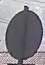

b31dddad-e3f9-47cb-88ca-350cdaae185d.png             tensor(0.2466, device='cuda:0')    tensor([181,   6,   9, 132, 128], device='cuda:0')
b31dddad-e3f9-47cb-88ca-350cdaae185d.png             tensor(0.3155, device='cuda:0')    tensor([132,  36, 133, 181,   6], device='cuda:0')


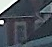

35865e1b-8969-42f8-93b8-ac122e5ef6e3.png             tensor(0.0422, device='cuda:0')    tensor([6, 9, 5, 7, 8], device='cuda:0')
35865e1b-8969-42f8-93b8-ac122e5ef6e3.png             tensor(1.7556, device='cuda:0')    tensor([ 9, 27,  1,  6, 37], device='cuda:0')


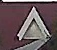

9db34cba-cf93-41d6-8eaa-c27922322834.png             tensor(0.6847, device='cuda:0')    tensor([181, 155, 163, 121, 162], device='cuda:0')
9db34cba-cf93-41d6-8eaa-c27922322834.png             tensor(1.8261, device='cuda:0')    tensor([155, 150,  91, 148, 181], device='cuda:0')


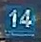

fe986f21-2aa1-44ff-9ba0-fda9e3fe6328.png             tensor(1.2975, device='cuda:0')    tensor([119,  14, 117, 153, 120], device='cuda:0')
fe986f21-2aa1-44ff-9ba0-fda9e3fe6328.png             tensor(1.2807, device='cuda:0')    tensor([178, 153, 109, 118, 181], device='cuda:0')


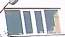

7d5a5425-eedc-4633-ae04-46428d0e6c61.png             tensor(0.2309, device='cuda:0')    tensor([22, 24, 25, 34,  5], device='cuda:0')
7d5a5425-eedc-4633-ae04-46428d0e6c61.png             tensor(1.9673, device='cuda:0')    tensor([23, 20,  5, 12, 34], device='cuda:0')


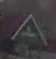

1490f169-8b9f-4fd4-992f-3d91d9aecf43.png             tensor(4.4586, device='cuda:0')    tensor([24, 18, 22, 34, 28], device='cuda:0')
1490f169-8b9f-4fd4-992f-3d91d9aecf43.png             tensor(0.1499, device='cuda:0')    tensor([ 13,  34, 181, 100,  22], device='cuda:0')


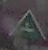

89d08916-b5cc-461e-ab5e-d69e7d21dba6.png             tensor(0.9154, device='cuda:0')    tensor([34, 24, 35, 28, 27], device='cuda:0')
89d08916-b5cc-461e-ab5e-d69e7d21dba6.png             tensor(1.7317, device='cuda:0')    tensor([23, 34,  6,  9,  0], device='cuda:0')


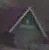

de919b11-8599-47b4-906b-d3afdb9f4d35.png             tensor(2.9948, device='cuda:0')    tensor([24, 22, 34, 28, 18], device='cuda:0')
de919b11-8599-47b4-906b-d3afdb9f4d35.png             tensor(0.5665, device='cuda:0')    tensor([ 23,  13,  34,  12, 162], device='cuda:0')


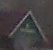

314194db-8667-4635-ae09-7c655c072f2a.png             tensor(0.0823, device='cuda:0')    tensor([25, 35, 34,  5, 10], device='cuda:0')
314194db-8667-4635-ae09-7c655c072f2a.png             tensor(0.1430, device='cuda:0')    tensor([23,  9,  5, 24,  6], device='cuda:0')


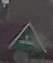

22f987ab-f3af-4358-8f4f-6a2f59a47dcf.png             tensor(4.3788, device='cuda:0')    tensor([181, 169, 133, 136, 137], device='cuda:0')
22f987ab-f3af-4358-8f4f-6a2f59a47dcf.png             tensor(2.2796, device='cuda:0')    tensor([169, 181, 124, 133, 173], device='cuda:0')


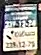

091f2fdd-361f-47ea-926a-40934fb2b351.png             tensor(0.2060, device='cuda:0')    tensor([ 19,  34, 181,  28,  14], device='cuda:0')
091f2fdd-361f-47ea-926a-40934fb2b351.png             tensor(0.7803, device='cuda:0')    tensor([181,  34,  75,  19,  42], device='cuda:0')


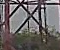

a28101eb-13f7-4a16-9794-42a4fe9dda53.png             tensor(0.3668, device='cuda:0')    tensor([95, 97, 99, 98, 43], device='cuda:0')
a28101eb-13f7-4a16-9794-42a4fe9dda53.png             tensor(0.2347, device='cuda:0')    tensor([100,  98,  97, 181,  73], device='cuda:0')


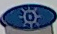

578a0a8c-afa1-45f9-b0c8-8c63c7fcc02a.png             tensor(0.5837, device='cuda:0')    tensor([100,  98,  99,  75,  78], device='cuda:0')
578a0a8c-afa1-45f9-b0c8-8c63c7fcc02a.png             tensor(1.0441, device='cuda:0')    tensor([142, 100, 181,  98,  99], device='cuda:0')


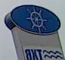

afffd698-4de6-40fb-87c7-f3c5d86eaad2.png             tensor(0.1126, device='cuda:0')    tensor([130, 181, 106, 133, 140], device='cuda:0')
afffd698-4de6-40fb-87c7-f3c5d86eaad2.png             tensor(2.0878, device='cuda:0')    tensor([129, 181, 133, 109, 123], device='cuda:0')


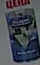

ed16df94-defb-41ae-a3cb-a6ab177c893e.png             tensor(0.6413, device='cuda:0')    tensor([180,  44,  79, 100,  73], device='cuda:0')
ed16df94-defb-41ae-a3cb-a6ab177c893e.png             tensor(2.3117, device='cuda:0')    tensor([100,  54,  95, 105, 159], device='cuda:0')


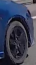

1862fa1e-1092-4ef7-b108-179adc9e001b.png             tensor(11.0019, device='cuda:0')    tensor([181,  34,  33,  31,  44], device='cuda:0')
1862fa1e-1092-4ef7-b108-179adc9e001b.png             tensor(0.0069, device='cuda:0')    tensor([181,  34, 150, 120, 100], device='cuda:0')


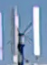

866c3f2f-916b-49d6-a84b-70479da3106a.png             tensor(3.5416, device='cuda:0')    tensor([181, 119, 108, 117, 118], device='cuda:0')
866c3f2f-916b-49d6-a84b-70479da3106a.png             tensor(1.2048, device='cuda:0')    tensor([181, 118, 160, 178, 175], device='cuda:0')


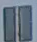

bde0a63e-16bc-4f3f-a78b-3d1270d9409f.png             tensor(2.2180, device='cuda:0')    tensor([181, 121, 162, 109, 111], device='cuda:0')
bde0a63e-16bc-4f3f-a78b-3d1270d9409f.png             tensor(0.8810, device='cuda:0')    tensor([133, 156, 163, 136, 181], device='cuda:0')


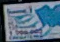

30e2310b-1a87-4af1-be5b-be3539315e8a.png             tensor(0.1857, device='cuda:0')    tensor([163, 181, 134, 133, 121], device='cuda:0')
30e2310b-1a87-4af1-be5b-be3539315e8a.png             tensor(4.0159, device='cuda:0')    tensor([181, 158, 133, 155, 113], device='cuda:0')


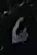

b902bdc0-7bae-4ebe-829d-fb57bcec33c3.png             tensor(0.3557, device='cuda:0')    tensor([163, 181,  92,  25,  91], device='cuda:0')
b902bdc0-7bae-4ebe-829d-fb57bcec33c3.png             tensor(1.5777, device='cuda:0')    tensor([181, 155, 150,  91, 113], device='cuda:0')


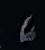

0d4da9d2-d263-470d-baa3-a20c4aa76e34.png             tensor(5.9336, device='cuda:0')    tensor([181, 121, 163, 153, 162], device='cuda:0')
0d4da9d2-d263-470d-baa3-a20c4aa76e34.png             tensor(0.1364, device='cuda:0')    tensor([181, 151, 150, 163, 155], device='cuda:0')


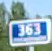

7f9943fd-4f72-49de-8c8d-290152c697ef.png             tensor(1.5838, device='cuda:0')    tensor([181,  12, 163,   8,   9], device='cuda:0')
7f9943fd-4f72-49de-8c8d-290152c697ef.png             tensor(6.5726, device='cuda:0')    tensor([181, 151, 163,  93, 133], device='cuda:0')


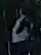

429c9727-1c7a-44cd-8fa7-991065dda07a.png             tensor(2.4606, device='cuda:0')    tensor([181,   9,  94,  12,   8], device='cuda:0')
429c9727-1c7a-44cd-8fa7-991065dda07a.png             tensor(0.8510, device='cuda:0')    tensor([181, 134, 133, 155, 161], device='cuda:0')


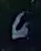

5fe33902-e43a-418a-8756-6f5560d99cfc.png             tensor(0.2696, device='cuda:0')    tensor([181, 163,  92,  91, 162], device='cuda:0')
5fe33902-e43a-418a-8756-6f5560d99cfc.png             tensor(0.8849, device='cuda:0')    tensor([181, 155, 134, 133, 158], device='cuda:0')


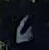

1ddf56dc-3660-4128-ad40-687d8ac9e328.png             tensor(0.2893, device='cuda:0')    tensor([181, 163,   9, 162,  92], device='cuda:0')
1ddf56dc-3660-4128-ad40-687d8ac9e328.png             tensor(4.1053, device='cuda:0')    tensor([181, 151, 133, 150, 155], device='cuda:0')


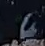

dd77f14b-889a-476f-a8a0-ca2fbfeaf8de.png             tensor(1.2121, device='cuda:0')    tensor([181,  39,  34, 175,  75], device='cuda:0')
dd77f14b-889a-476f-a8a0-ca2fbfeaf8de.png             tensor(2.7377, device='cuda:0')    tensor([181,  75,  49,  39, 175], device='cuda:0')


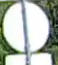

8a177d04-ce6d-49a6-ab8a-6faf070449c3.png             tensor(1.5353, device='cuda:0')    tensor([181,   9, 163,   5,   8], device='cuda:0')
8a177d04-ce6d-49a6-ab8a-6faf070449c3.png             tensor(8.1038, device='cuda:0')    tensor([181, 129, 162, 120, 170], device='cuda:0')


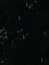

3847d77e-3412-4ad0-85d5-1f73ba8daa9d.png             tensor(0.1200, device='cuda:0')    tensor([181, 151, 162, 117, 163], device='cuda:0')
3847d77e-3412-4ad0-85d5-1f73ba8daa9d.png             tensor(3.0914, device='cuda:0')    tensor([150, 148, 118, 117, 120], device='cuda:0')


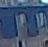

6e22dc98-0d18-45da-b2d8-3929f5b6214f.png             tensor(0.0022, device='cuda:0')    tensor([ 7, 17, 19, 30, 31], device='cuda:0')
6e22dc98-0d18-45da-b2d8-3929f5b6214f.png             tensor(0.1275, device='cuda:0')    tensor([126,  17,  19,  22,  13], device='cuda:0')


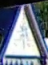

006375dd-368e-47d7-8008-0af9db1322d5.png             tensor(2.3389, device='cuda:0')    tensor([ 0,  4, 14, 16,  8], device='cuda:0')
006375dd-368e-47d7-8008-0af9db1322d5.png             tensor(0.3630, device='cuda:0')    tensor([ 0, 16, 14, 15, 24], device='cuda:0')


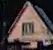

206dd6a3-3ce5-472f-a937-38de4f44a9f2.png             tensor(1.7557, device='cuda:0')    tensor([181,   2,  34,  36,  39], device='cuda:0')
206dd6a3-3ce5-472f-a937-38de4f44a9f2.png             tensor(5.8543, device='cuda:0')    tensor([181,  27,  36, 175,  49], device='cuda:0')


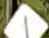

4cefe41a-06d3-493f-83c4-e5afae1ade3f.png             tensor(1.9943, device='cuda:0')    tensor([181,  75,  34,   2,  36], device='cuda:0')
4cefe41a-06d3-493f-83c4-e5afae1ade3f.png             tensor(5.8414, device='cuda:0')    tensor([181,  27,  75,  36, 108], device='cuda:0')


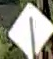

f2be9c1f-0e2e-4535-9ffa-53cc07b3c4f7.png             tensor(1.6977, device='cuda:0')    tensor([181,   9,   5, 121, 163], device='cuda:0')
f2be9c1f-0e2e-4535-9ffa-53cc07b3c4f7.png             tensor(4.7623, device='cuda:0')    tensor([181, 133, 158, 154, 118], device='cuda:0')


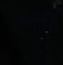

1dc98d3c-fdb4-40d4-8805-b7bb94615d2f.png             tensor(0.3155, device='cuda:0')    tensor([162,  23, 163,  35,   9], device='cuda:0')
1dc98d3c-fdb4-40d4-8805-b7bb94615d2f.png             tensor(0.2534, device='cuda:0')    tensor([120,  73, 181, 121, 162], device='cuda:0')


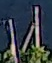

0bdaf72e-184e-4f0f-a9b1-14dc5dc61bbf.png             tensor(1.8742, device='cuda:0')    tensor([181, 163, 162,   9,   5], device='cuda:0')
0bdaf72e-184e-4f0f-a9b1-14dc5dc61bbf.png             tensor(2.2613, device='cuda:0')    tensor([181, 162, 158, 129, 155], device='cuda:0')


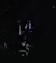

32c623d1-4332-4503-9da4-6e4bdcde2038.png             tensor(9.6499, device='cuda:0')    tensor([ 46, 180,  47,  70,  15], device='cuda:0')
32c623d1-4332-4503-9da4-6e4bdcde2038.png             tensor(0.1961, device='cuda:0')    tensor([ 47,  46, 180,  48,  74], device='cuda:0')


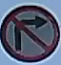

67886e2f-f40c-4b17-a442-50a6ee3a23d5.png             tensor(8.7690, device='cuda:0')    tensor([ 46, 180,  15,  47,  70], device='cuda:0')
67886e2f-f40c-4b17-a442-50a6ee3a23d5.png             tensor(5.5475, device='cuda:0')    tensor([47, 46, 48, 74, 60], device='cuda:0')


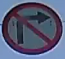

34aa516f-46a7-4223-befb-a443587d32e4.png             tensor(6.4042, device='cuda:0')    tensor([ 46, 180,  70,  47,  15], device='cuda:0')
34aa516f-46a7-4223-befb-a443587d32e4.png             tensor(2.0855, device='cuda:0')    tensor([47, 46, 74, 48, 15], device='cuda:0')


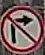

55934595-12fd-40e0-9bca-533613ae29af.png             tensor(8.1865, device='cuda:0')    tensor([ 46, 180,  47,  15,  48], device='cuda:0')
55934595-12fd-40e0-9bca-533613ae29af.png             tensor(3.1792, device='cuda:0')    tensor([47, 46, 48, 74, 15], device='cuda:0')


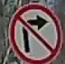

5a3f8f84-4f8b-4340-9299-729683b5a830.png             tensor(5.7839, device='cuda:0')    tensor([ 46, 180,  70,  81,  66], device='cuda:0')
5a3f8f84-4f8b-4340-9299-729683b5a830.png             tensor(0.9234, device='cuda:0')    tensor([ 46,  47, 180,  60,  74], device='cuda:0')


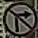

b69f8e5f-a542-4172-8c4e-2b21f9dd3b52.png             tensor(7.5869, device='cuda:0')    tensor([ 46, 180,  70,  47,  81], device='cuda:0')
b69f8e5f-a542-4172-8c4e-2b21f9dd3b52.png             tensor(2.6110, device='cuda:0')    tensor([47, 46, 48, 74, 60], device='cuda:0')


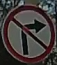

e6431ca2-65e9-4fe7-b922-fd6b5d696caa.png             tensor(6.0834, device='cuda:0')    tensor([ 46, 180,  70,  47,  81], device='cuda:0')
e6431ca2-65e9-4fe7-b922-fd6b5d696caa.png             tensor(1.6789, device='cuda:0')    tensor([47, 46, 48, 74, 60], device='cuda:0')


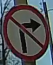

57926b57-0086-4818-9e27-98c357aee826.png             tensor(3.3498, device='cuda:0')    tensor([ 46, 180,  70,  74, 101], device='cuda:0')
57926b57-0086-4818-9e27-98c357aee826.png             tensor(1.4758, device='cuda:0')    tensor([ 47,  46,  48,  74, 180], device='cuda:0')


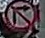

730ec601-7090-4c19-bad6-c078783ea80c.png             tensor(3.3988, device='cuda:0')    tensor([ 46, 180,  70, 127,  47], device='cuda:0')
730ec601-7090-4c19-bad6-c078783ea80c.png             tensor(1.1938, device='cuda:0')    tensor([ 47,  46,  74,  48, 180], device='cuda:0')


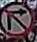

b5d8b282-abf3-4b14-a14f-838c3e5e74a7.png             tensor(7.5328, device='cuda:0')    tensor([ 46, 180,  47,  70,  15], device='cuda:0')
b5d8b282-abf3-4b14-a14f-838c3e5e74a7.png             tensor(1.5548, device='cuda:0')    tensor([47, 46, 74, 48, 15], device='cuda:0')


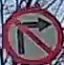

86234791-962a-4773-9544-5f98f954a11f.png             tensor(8.5397, device='cuda:0')    tensor([ 46, 180,  47,  70,  48], device='cuda:0')
86234791-962a-4773-9544-5f98f954a11f.png             tensor(1.0420, device='cuda:0')    tensor([46, 47, 48, 74, 60], device='cuda:0')


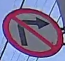

07afec73-8a39-49b4-848d-c2eba6846df5.png             tensor(1.6084, device='cuda:0')    tensor([ 46, 180,  81,  70,  94], device='cuda:0')
07afec73-8a39-49b4-848d-c2eba6846df5.png             tensor(2.0428, device='cuda:0')    tensor([ 46,  47, 180,  74,  48], device='cuda:0')


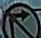

919288ab-c891-4789-8bf3-22deb862ef6a.png             tensor(9.9053, device='cuda:0')    tensor([ 46, 180,  70,  15,  47], device='cuda:0')
919288ab-c891-4789-8bf3-22deb862ef6a.png             tensor(3.1299, device='cuda:0')    tensor([ 47,  46,  48,  74, 180], device='cuda:0')


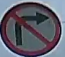

e52568f5-cf73-4b3d-a72d-87900ae1ab81.png             tensor(9.7498, device='cuda:0')    tensor([ 46, 180,  47,  94,  70], device='cuda:0')
e52568f5-cf73-4b3d-a72d-87900ae1ab81.png             tensor(1.6488, device='cuda:0')    tensor([ 46,  47,  74,  48, 180], device='cuda:0')


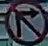

babf89f7-a04e-4a4f-91ba-1e7f025db0ea.png             tensor(9.1384, device='cuda:0')    tensor([ 46, 180,  70,  15,  74], device='cuda:0')
babf89f7-a04e-4a4f-91ba-1e7f025db0ea.png             tensor(0.1152, device='cuda:0')    tensor([74, 46, 47, 48, 60], device='cuda:0')


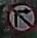

1b176f55-0b53-45ad-bb6f-8371579843b8.png             tensor(5.4948, device='cuda:0')    tensor([ 46, 180,  74,  48,  47], device='cuda:0')
1b176f55-0b53-45ad-bb6f-8371579843b8.png             tensor(0.9914, device='cuda:0')    tensor([46, 74, 47, 48, 60], device='cuda:0')


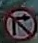

83bd285c-e926-4f3b-a911-d98a7396a6b0.png             tensor(6.6698, device='cuda:0')    tensor([ 46, 180,  47,  74,  48], device='cuda:0')
83bd285c-e926-4f3b-a911-d98a7396a6b0.png             tensor(0.7383, device='cuda:0')    tensor([ 46,  47,  74,  48, 180], device='cuda:0')


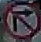

34832341-a3cc-4708-8122-87ca2b61d861.png             tensor(7.6855, device='cuda:0')    tensor([ 46, 180,  70,  47,  15], device='cuda:0')
34832341-a3cc-4708-8122-87ca2b61d861.png             tensor(0.7975, device='cuda:0')    tensor([ 46,  47,  74, 180,  48], device='cuda:0')


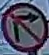

5b7845b3-1bea-4e39-9f9a-f29e7ceb01a4.png             tensor(7.1086, device='cuda:0')    tensor([ 46, 180,  70,   8,  81], device='cuda:0')
5b7845b3-1bea-4e39-9f9a-f29e7ceb01a4.png             tensor(0.2766, device='cuda:0')    tensor([ 47,  46,  74,  48, 180], device='cuda:0')


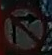

3c8b005f-6fe7-4e0f-b5e1-8a746b1ec0f1.png             tensor(11.8449, device='cuda:0')    tensor([ 46, 180,  15,  70,   8], device='cuda:0')
3c8b005f-6fe7-4e0f-b5e1-8a746b1ec0f1.png             tensor(1.4603, device='cuda:0')    tensor([ 46,  74,  47, 118,  48], device='cuda:0')


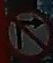

5acd5b71-8188-445e-bb7f-263f42b0c786.png             tensor(8.4421, device='cuda:0')    tensor([ 46, 180,  75,  15,  94], device='cuda:0')
5acd5b71-8188-445e-bb7f-263f42b0c786.png             tensor(0.8546, device='cuda:0')    tensor([ 46,  47,  48, 180,  74], device='cuda:0')


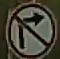

e0c97e8f-2e8a-42bf-8f65-a844b197158d.png             tensor(7.0162, device='cuda:0')    tensor([ 46, 180,  70,  81,   8], device='cuda:0')
e0c97e8f-2e8a-42bf-8f65-a844b197158d.png             tensor(0.6159, device='cuda:0')    tensor([47, 46, 74, 48, 85], device='cuda:0')


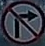

fd165ef9-a614-4f4d-bd75-7491724589c4.png             tensor(11.0069, device='cuda:0')    tensor([ 46, 180,  70,  81,   8], device='cuda:0')
fd165ef9-a614-4f4d-bd75-7491724589c4.png             tensor(2.0526, device='cuda:0')    tensor([47, 46, 48, 74, 60], device='cuda:0')


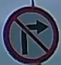

228bbfe8-fd2d-4abd-b308-f9f1a8566cb8.png             tensor(10.2085, device='cuda:0')    tensor([ 46, 180,  70,   8,  81], device='cuda:0')
228bbfe8-fd2d-4abd-b308-f9f1a8566cb8.png             tensor(1.5600, device='cuda:0')    tensor([47, 46, 48, 74, 60], device='cuda:0')


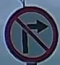

feb6ae23-7ab0-48d8-956b-e0b7a1b458d6.png             tensor(8.7616, device='cuda:0')    tensor([ 46, 180,  70,  47,  81], device='cuda:0')
feb6ae23-7ab0-48d8-956b-e0b7a1b458d6.png             tensor(2.4950, device='cuda:0')    tensor([47, 46, 48, 74, 60], device='cuda:0')


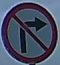

5d4ac07d-d462-4c45-bc27-799ff402bfc5.png             tensor(8.6537, device='cuda:0')    tensor([ 46, 180,  70,  47,  81], device='cuda:0')
5d4ac07d-d462-4c45-bc27-799ff402bfc5.png             tensor(2.4636, device='cuda:0')    tensor([47, 46, 48, 74, 60], device='cuda:0')


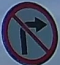

ca873796-bc6c-445f-b88b-8bae04e311d1.png             tensor(6.9109, device='cuda:0')    tensor([ 46, 180,  70,  47,  81], device='cuda:0')
ca873796-bc6c-445f-b88b-8bae04e311d1.png             tensor(2.6978, device='cuda:0')    tensor([47, 46, 48, 74, 60], device='cuda:0')


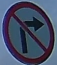

37b9dd6c-8261-4c83-85af-907ec6409782.png             tensor(5.7376, device='cuda:0')    tensor([ 46, 180,  47,  70,  81], device='cuda:0')
37b9dd6c-8261-4c83-85af-907ec6409782.png             tensor(1.6770, device='cuda:0')    tensor([47, 46, 74, 48, 60], device='cuda:0')


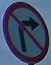

3cac3c6c-c683-495a-83de-fde9079972b9.png             tensor(6.0386, device='cuda:0')    tensor([ 46, 180,  75,  66,  70], device='cuda:0')
3cac3c6c-c683-495a-83de-fde9079972b9.png             tensor(0.5817, device='cuda:0')    tensor([ 47,  46, 180,  60,  48], device='cuda:0')


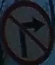

17143745-a410-4e36-8f4b-c89ac0285a7e.png             tensor(7.6918, device='cuda:0')    tensor([ 46, 180,  70,  94,  75], device='cuda:0')
17143745-a410-4e36-8f4b-c89ac0285a7e.png             tensor(1.2143, device='cuda:0')    tensor([46, 47, 60, 51, 74], device='cuda:0')


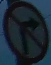

8dbeb3a2-445b-4a0e-aa25-f657772a3bae.png             tensor(0.0899, device='cuda:0')    tensor([ 47,  46, 180,  74, 127], device='cuda:0')
8dbeb3a2-445b-4a0e-aa25-f657772a3bae.png             tensor(4.9291, device='cuda:0')    tensor([47, 46, 60, 74, 42], device='cuda:0')


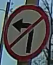

35b819df-8369-409a-9316-7090f3355113.png             tensor(0.6351, device='cuda:0')    tensor([ 46, 180,  47,  74, 127], device='cuda:0')
35b819df-8369-409a-9316-7090f3355113.png             tensor(2.5241, device='cuda:0')    tensor([47, 46, 42, 74, 60], device='cuda:0')


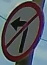

f16c6428-f47c-46e4-b184-afdbc0fac199.png             tensor(1.1860, device='cuda:0')    tensor([127,  74,  47, 180, 101], device='cuda:0')
f16c6428-f47c-46e4-b184-afdbc0fac199.png             tensor(6.6798, device='cuda:0')    tensor([47, 74, 75, 60, 42], device='cuda:0')


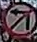

606cdc61-8096-4baf-82c4-f0e32b9ea5f1.png             tensor(1.2308, device='cuda:0')    tensor([ 74, 180, 127,  47, 101], device='cuda:0')
606cdc61-8096-4baf-82c4-f0e32b9ea5f1.png             tensor(6.6197, device='cuda:0')    tensor([47, 60, 46, 74, 42], device='cuda:0')


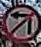

c09788f8-7202-4d9e-8020-8f18a86ac451.png             tensor(1.6705, device='cuda:0')    tensor([ 47,  74, 127,  46, 180], device='cuda:0')
c09788f8-7202-4d9e-8020-8f18a86ac451.png             tensor(1.9491, device='cuda:0')    tensor([47, 46, 74, 42, 75], device='cuda:0')


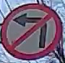

22d537dd-93c2-44fd-87e1-3b74b90e478c.png             tensor(1.7283, device='cuda:0')    tensor([ 47,  74, 127,  46, 180], device='cuda:0')
22d537dd-93c2-44fd-87e1-3b74b90e478c.png             tensor(2.1761, device='cuda:0')    tensor([47, 46, 74, 75, 42], device='cuda:0')


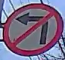

292ecf83-4a1e-421b-bdc6-82a76ac13fd4.png             tensor(0.1367, device='cuda:0')    tensor([ 47,  46, 127,  74, 180], device='cuda:0')
292ecf83-4a1e-421b-bdc6-82a76ac13fd4.png             tensor(3.0868, device='cuda:0')    tensor([47, 46, 74, 60, 85], device='cuda:0')


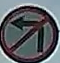

8b0e90a6-f23b-4e08-a8f6-d612de527803.png             tensor(1.3528, device='cuda:0')    tensor([ 74,  46, 127, 101,  47], device='cuda:0')
8b0e90a6-f23b-4e08-a8f6-d612de527803.png             tensor(4.6892, device='cuda:0')    tensor([47, 74, 46, 60, 42], device='cuda:0')


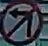

a44ac79f-7a94-4e4d-80f5-541e59af90b8.png             tensor(0.7858, device='cuda:0')    tensor([ 74, 127,  47, 180, 101], device='cuda:0')
a44ac79f-7a94-4e4d-80f5-541e59af90b8.png             tensor(6.4672, device='cuda:0')    tensor([47, 60, 46, 74, 48], device='cuda:0')


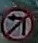

797f461b-884a-4836-afdb-92cb82d6aeb1.png             tensor(4.6402, device='cuda:0')    tensor([ 47,  46,  74,  57, 180], device='cuda:0')
797f461b-884a-4836-afdb-92cb82d6aeb1.png             tensor(1.7502, device='cuda:0')    tensor([ 47,  46,  74,  48, 181], device='cuda:0')


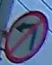

cbb7a237-fcfb-4690-b263-ac0ee3941f3b.png             tensor(2.5407, device='cuda:0')    tensor([127,  47, 101,  74, 180], device='cuda:0')
cbb7a237-fcfb-4690-b263-ac0ee3941f3b.png             tensor(3.5210, device='cuda:0')    tensor([47, 75, 46, 74, 42], device='cuda:0')


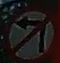

184f6606-4914-46f3-992b-f255a99c3dbe.png             tensor(0.4256, device='cuda:0')    tensor([ 47, 127,  46, 180, 101], device='cuda:0')
184f6606-4914-46f3-992b-f255a99c3dbe.png             tensor(3.2751, device='cuda:0')    tensor([ 47,  46, 181,  60,  75], device='cuda:0')


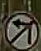

860f7316-8c2f-4add-84e0-484b63d68268.png             tensor(0.3305, device='cuda:0')    tensor([ 74, 101,  47, 127, 180], device='cuda:0')
860f7316-8c2f-4add-84e0-484b63d68268.png             tensor(6.0338, device='cuda:0')    tensor([47, 60, 42, 46, 85], device='cuda:0')


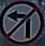

1797c5d9-b79b-4593-8395-383479254671.png             tensor(1.4602, device='cuda:0')    tensor([ 47,  74,  46, 180,  15], device='cuda:0')
1797c5d9-b79b-4593-8395-383479254671.png             tensor(5.4496, device='cuda:0')    tensor([47, 60, 46, 74, 42], device='cuda:0')


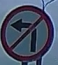

74260210-f70e-44cd-a719-8e50645a957f.png             tensor(0.3325, device='cuda:0')    tensor([ 74,  47,  46, 180,  73], device='cuda:0')
74260210-f70e-44cd-a719-8e50645a957f.png             tensor(6.1263, device='cuda:0')    tensor([47, 74, 60, 42, 46], device='cuda:0')


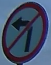

08120341-8b07-4fb6-b714-6ebe001fd538.png             tensor(0.5677, device='cuda:0')    tensor([ 47, 180,  74,  42,  46], device='cuda:0')
08120341-8b07-4fb6-b714-6ebe001fd538.png             tensor(8.5614, device='cuda:0')    tensor([47, 46, 60, 42, 74], device='cuda:0')


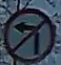

cb001816-e3c6-49a8-b775-185acf35c717.png             tensor(0.7601, device='cuda:0')    tensor([51, 50, 93, 79, 80], device='cuda:0')
cb001816-e3c6-49a8-b775-185acf35c717.png             tensor(2.3501, device='cuda:0')    tensor([50, 51, 44, 81, 78], device='cuda:0')


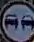

4d8c4a42-c39e-4596-9b52-2e31739aa0f0.png             tensor(8.0768, device='cuda:0')    tensor([51, 50, 80, 75, 65], device='cuda:0')
4d8c4a42-c39e-4596-9b52-2e31739aa0f0.png             tensor(2.0454, device='cuda:0')    tensor([50, 51, 80, 81, 60], device='cuda:0')


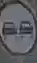

9bdfb1a8-6280-4ea6-9a23-fc5e75617535.png             tensor(2.1939, device='cuda:0')    tensor([180,  51,  65, 181,  42], device='cuda:0')
9bdfb1a8-6280-4ea6-9a23-fc5e75617535.png             tensor(5.4089, device='cuda:0')    tensor([51, 44, 50, 47, 75], device='cuda:0')


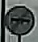

dff856af-930b-4296-ae52-d3c7aa02ac1f.png             tensor(6.0835, device='cuda:0')    tensor([ 51, 180,  65,  75,  34], device='cuda:0')
dff856af-930b-4296-ae52-d3c7aa02ac1f.png             tensor(0.8915, device='cuda:0')    tensor([ 51, 180,  44,  79,  45], device='cuda:0')


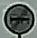

e2b52e9d-5145-4667-9f99-ba04c9d1e523.png             tensor(0.0852, device='cuda:0')    tensor([66, 75, 51, 46, 49], device='cuda:0')
e2b52e9d-5145-4667-9f99-ba04c9d1e523.png             tensor(8.1683, device='cuda:0')    tensor([ 75,  51, 181,  49,  63], device='cuda:0')


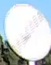

cfcad322-0126-4b87-b224-ffabaae96b80.png             tensor(0.9265, device='cuda:0')    tensor([51, 75, 66, 65, 92], device='cuda:0')
cfcad322-0126-4b87-b224-ffabaae96b80.png             tensor(6.3864, device='cuda:0')    tensor([75, 51, 39, 65, 66], device='cuda:0')


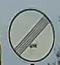

60328be6-21a5-4a86-9c4a-7627d70b59d2.png             tensor(0.5591, device='cuda:0')    tensor([51, 75, 66, 91, 92], device='cuda:0')
60328be6-21a5-4a86-9c4a-7627d70b59d2.png             tensor(7.8099, device='cuda:0')    tensor([75, 51, 65, 66, 39], device='cuda:0')


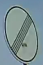

8e707f71-b359-44b5-98bf-df1565851fc3.png             tensor(10.9254, device='cuda:0')    tensor([83, 99, 88, 89, 73], device='cuda:0')
8e707f71-b359-44b5-98bf-df1565851fc3.png             tensor(0.4875, device='cuda:0')    tensor([ 99,  89,  83,  88, 181], device='cuda:0')


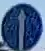

33e52395-3266-4d9b-9b37-83e9b511379a.png             tensor(6.9379, device='cuda:0')    tensor([ 84,  85, 118,  46,  90], device='cuda:0')
33e52395-3266-4d9b-9b37-83e9b511379a.png             tensor(0.1145, device='cuda:0')    tensor([181, 118, 134, 161, 163], device='cuda:0')


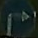

96a4093d-4117-48ab-9c74-3f5754ca0c41.png             tensor(1.0646, device='cuda:0')    tensor([ 84, 118,  46, 181,  85], device='cuda:0')
96a4093d-4117-48ab-9c74-3f5754ca0c41.png             tensor(2.8620, device='cuda:0')    tensor([181, 118,  84, 163, 120], device='cuda:0')


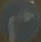

42609d9f-0a9d-4aff-b859-7066ec082c87.png             tensor(6.6618, device='cuda:0')    tensor([ 84, 118,  46,  85,  91], device='cuda:0')
42609d9f-0a9d-4aff-b859-7066ec082c87.png             tensor(2.6839, device='cuda:0')    tensor([118,  84, 181,  68, 120], device='cuda:0')


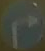

2ce0f510-9c73-4e22-9a4f-308201f01df8.png             tensor(3.3890, device='cuda:0')    tensor([ 86,  87, 119,  90, 163], device='cuda:0')
2ce0f510-9c73-4e22-9a4f-308201f01df8.png             tensor(0.1686, device='cuda:0')    tensor([ 86, 119,  87, 181, 134], device='cuda:0')


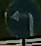

4993c894-91a0-4f38-8217-6c1f7701e847.png             tensor(2.1086, device='cuda:0')    tensor([ 86, 119,   4,  47, 181], device='cuda:0')
4993c894-91a0-4f38-8217-6c1f7701e847.png             tensor(1.0150, device='cuda:0')    tensor([181, 119, 120,  75,  86], device='cuda:0')


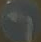

a1966dd8-79e2-475e-b6ad-d13351a0dbff.png             tensor(6.8651, device='cuda:0')    tensor([ 86, 119,  47,  90,   4], device='cuda:0')
a1966dd8-79e2-475e-b6ad-d13351a0dbff.png             tensor(0.1808, device='cuda:0')    tensor([181, 119,  86, 120,  87], device='cuda:0')


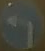

649f2607-01f7-41df-ac1e-d7b44fef2069.png             tensor(6.7757, device='cuda:0')    tensor([121, 150, 122, 120, 118], device='cuda:0')
649f2607-01f7-41df-ac1e-d7b44fef2069.png             tensor(1.7383, device='cuda:0')    tensor([121, 122, 150, 109, 117], device='cuda:0')


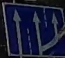

b5a2a98e-5f20-44ab-b6e1-f5377d2d5d88.png             tensor(1.7890, device='cuda:0')    tensor([121, 150, 122, 120, 117], device='cuda:0')
b5a2a98e-5f20-44ab-b6e1-f5377d2d5d88.png             tensor(2.4075, device='cuda:0')    tensor([121, 122, 150, 109, 117], device='cuda:0')


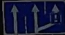

ca2b6d63-9d05-41bc-a506-6530445c7d62.png             tensor(1.3408, device='cuda:0')    tensor([121, 150, 122, 117, 120], device='cuda:0')
ca2b6d63-9d05-41bc-a506-6530445c7d62.png             tensor(1.0004, device='cuda:0')    tensor([121, 122, 150, 109, 162], device='cuda:0')


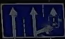

3721f54f-b818-4994-b6bc-a23b0424e26a.png             tensor(1.3092, device='cuda:0')    tensor([117, 121, 120, 118, 150], device='cuda:0')
3721f54f-b818-4994-b6bc-a23b0424e26a.png             tensor(5.3667, device='cuda:0')    tensor([121, 122, 109, 163, 178], device='cuda:0')


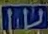

6be13a39-0e2b-4b55-b140-adb00b9a19eb.png             tensor(0.3862, device='cuda:0')    tensor([121, 117, 122, 120, 150], device='cuda:0')
6be13a39-0e2b-4b55-b140-adb00b9a19eb.png             tensor(2.9633, device='cuda:0')    tensor([121, 122, 150, 162, 109], device='cuda:0')


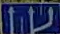

13e2e112-c676-47e7-adf3-1033a5fe94c7.png             tensor(6.4893, device='cuda:0')    tensor([121, 150, 122, 120, 128], device='cuda:0')
13e2e112-c676-47e7-adf3-1033a5fe94c7.png             tensor(1.0884, device='cuda:0')    tensor([121, 122, 109, 150, 117], device='cuda:0')


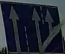

296f49d4-3c4e-47db-a256-0d2fe6464d00.png             tensor(1.1444, device='cuda:0')    tensor([117, 122, 120, 118, 119], device='cuda:0')
296f49d4-3c4e-47db-a256-0d2fe6464d00.png             tensor(4.4337, device='cuda:0')    tensor([122, 117, 109, 121, 178], device='cuda:0')


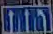

1176168f-1b65-4c48-8a02-9194e83802b0.png             tensor(2.6161, device='cuda:0')    tensor([117, 122, 120, 119, 118], device='cuda:0')
1176168f-1b65-4c48-8a02-9194e83802b0.png             tensor(2.4293, device='cuda:0')    tensor([122, 117, 109, 150, 121], device='cuda:0')


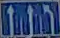

7c5748da-6c2c-4af1-9715-1576b64c5061.png             tensor(0.4435, device='cuda:0')    tensor([117, 122, 120, 118, 119], device='cuda:0')
7c5748da-6c2c-4af1-9715-1576b64c5061.png             tensor(2.5362, device='cuda:0')    tensor([122, 117, 109, 121, 150], device='cuda:0')


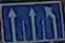

3ddf7aa4-afe6-46b0-8d09-0d1610d51fbf.png             tensor(2.8567, device='cuda:0')    tensor([117, 122, 120, 119, 118], device='cuda:0')
3ddf7aa4-afe6-46b0-8d09-0d1610d51fbf.png             tensor(1.4351, device='cuda:0')    tensor([122, 117, 109, 121, 178], device='cuda:0')


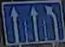

41513711-64b9-48db-beb9-62df8e4dfb46.png             tensor(3.9645, device='cuda:0')    tensor([117, 120, 122, 150, 118], device='cuda:0')
41513711-64b9-48db-beb9-62df8e4dfb46.png             tensor(0.6683, device='cuda:0')    tensor([122, 150, 117, 178, 109], device='cuda:0')


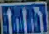

4735185d-08fb-43e9-b987-075a2141e638.png             tensor(1.2877, device='cuda:0')    tensor([122, 117, 120, 118, 150], device='cuda:0')
4735185d-08fb-43e9-b987-075a2141e638.png             tensor(1.5150, device='cuda:0')    tensor([122, 117, 150, 121, 178], device='cuda:0')


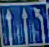

cde20966-fb52-46b9-ba4b-47f3b7e8b226.png             tensor(1.8253, device='cuda:0')    tensor([122, 117, 120, 118, 119], device='cuda:0')
cde20966-fb52-46b9-ba4b-47f3b7e8b226.png             tensor(5.0863, device='cuda:0')    tensor([122, 117, 109, 150, 121], device='cuda:0')


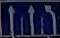

a88024df-e973-49d6-81c5-ccea34509111.png             tensor(0.5288, device='cuda:0')    tensor([117, 122, 120, 119, 118], device='cuda:0')
a88024df-e973-49d6-81c5-ccea34509111.png             tensor(6.0622, device='cuda:0')    tensor([122, 117, 109, 121, 150], device='cuda:0')


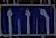

c91fc60a-f41f-43c1-a049-58f80c0f0bec.png             tensor(0.8025, device='cuda:0')    tensor([122, 117, 115, 120, 150], device='cuda:0')
c91fc60a-f41f-43c1-a049-58f80c0f0bec.png             tensor(2.8876, device='cuda:0')    tensor([122, 150, 117, 121, 178], device='cuda:0')


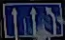

935acae8-7ffb-4a17-90a4-decccc5d726e.png             tensor(6.3095, device='cuda:0')    tensor([162, 163, 126,  97, 121], device='cuda:0')
935acae8-7ffb-4a17-90a4-decccc5d726e.png             tensor(7.4128, device='cuda:0')    tensor([163, 162, 118, 122,  74], device='cuda:0')


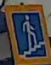

fe8c15f0-616f-42c3-b3b7-b30611ebcaf4.png             tensor(4.9373, device='cuda:0')    tensor([162, 163, 154, 148, 151], device='cuda:0')
fe8c15f0-616f-42c3-b3b7-b30611ebcaf4.png             tensor(1.3699, device='cuda:0')    tensor([162, 163,  40, 113, 115], device='cuda:0')


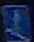

31289e55-472a-4d09-ba7a-09a5441f1a7e.png             tensor(5.5030, device='cuda:0')    tensor([162, 121, 163, 126, 148], device='cuda:0')
31289e55-472a-4d09-ba7a-09a5441f1a7e.png             tensor(1.9139, device='cuda:0')    tensor([163, 162, 121,  40, 122], device='cuda:0')


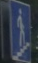

aa250757-3da8-4a85-a844-72e096e651be.png             tensor(6.2850, device='cuda:0')    tensor([162, 163, 126,  97, 121], device='cuda:0')
aa250757-3da8-4a85-a844-72e096e651be.png             tensor(0.8796, device='cuda:0')    tensor([163, 162, 126, 115, 164], device='cuda:0')


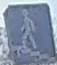

e2581aca-e0f7-4efc-a715-5751ce9d4fec.png             tensor(4.8634, device='cuda:0')    tensor([ 2, 14, 27,  1,  4], device='cuda:0')
e2581aca-e0f7-4efc-a715-5751ce9d4fec.png             tensor(0.1608, device='cuda:0')    tensor([ 1,  2, 36, 27, 13], device='cuda:0')


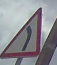

7e6e321d-d69e-4174-be15-461ce071abe3.png             tensor(1.3052, device='cuda:0')    tensor([ 10,  44,  23, 101,   6], device='cuda:0')
7e6e321d-d69e-4174-be15-461ce071abe3.png             tensor(4.7904, device='cuda:0')    tensor([10, 23, 17, 18, 24], device='cuda:0')


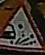

297971d4-d391-46de-a3c6-9e3ef52b8f54.png             tensor(7.5599, device='cuda:0')    tensor([10, 44,  6, 12, 25], device='cuda:0')
297971d4-d391-46de-a3c6-9e3ef52b8f54.png             tensor(1.6928, device='cuda:0')    tensor([ 10, 181,  44,  20,  27], device='cuda:0')


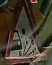

2487d9b7-fef3-4ec2-9df4-b475c0aa364d.png             tensor(1.1484, device='cuda:0')    tensor([ 18, 181, 169, 129,   6], device='cuda:0')
2487d9b7-fef3-4ec2-9df4-b475c0aa364d.png             tensor(2.7191, device='cuda:0')    tensor([ 18, 181,  12,  19,   0], device='cuda:0')


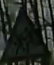

69f03a11-4334-40de-9dad-1a771f75579d.png             tensor(1.2941, device='cuda:0')    tensor([ 13,  33,  29, 181,   1], device='cuda:0')
69f03a11-4334-40de-9dad-1a771f75579d.png             tensor(0.5037, device='cuda:0')    tensor([ 69,  18,  64, 181,  29], device='cuda:0')


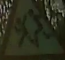

cdee3cc1-e159-4758-9795-f782ca7abc7b.png             tensor(0.4145, device='cuda:0')    tensor([11, 22,  4, 16, 24], device='cuda:0')
cdee3cc1-e159-4758-9795-f782ca7abc7b.png             tensor(1.6350, device='cuda:0')    tensor([22,  4, 21, 11, 16], device='cuda:0')


ae910f84-22c8-410c-84fe-37f14b6ee20c.png             tensor(0.9288, device='cuda:0')    tensor([ 31,  27, 181,  16,  34], device='cuda:0')
ae910f84-22c8-410c-84fe-37f14b6ee20c.png             tensor(7.4665, device='cuda:0')    tensor([ 27,  31, 181,  17,  21], device='cuda:0')


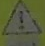

742d936e-9f03-4c12-bd5f-6a57d4b57173.png             tensor(4.4711, device='cuda:0')    tensor([181,  32,  49,  76,   9], device='cuda:0')
742d936e-9f03-4c12-bd5f-6a57d4b57173.png             tensor(0.1453, device='cuda:0')    tensor([181,  32,  49,  75,  76], device='cuda:0')


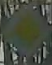

62a5c617-5da5-4335-af6c-6adbd2670b8b.png             tensor(1.0957, device='cuda:0')    tensor([ 32, 181,   9,  75,  33], device='cuda:0')
62a5c617-5da5-4335-af6c-6adbd2670b8b.png             tensor(4.5655, device='cuda:0')    tensor([ 32, 181,  49,  75,  33], device='cuda:0')


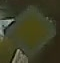

ff5312f8-96e4-4682-87b2-f86d46d60e84.png             tensor(0.3509, device='cuda:0')    tensor([ 35,  36,   1,   2, 108], device='cuda:0')
ff5312f8-96e4-4682-87b2-f86d46d60e84.png             tensor(9.2402, device='cuda:0')    tensor([36, 34,  3,  1, 23], device='cuda:0')


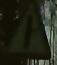

19895ad7-35cf-480a-863d-2481198b9334.png             tensor(1.1111, device='cuda:0')    tensor([ 37,   6, 120, 132, 143], device='cuda:0')
19895ad7-35cf-480a-863d-2481198b9334.png             tensor(8.9418, device='cuda:0')    tensor([ 37,   6, 120,  10, 169], device='cuda:0')


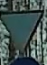

3105fb9f-c75d-4f5d-9375-9079adb109b5.png             tensor(1.3475, device='cuda:0')    tensor([72, 73, 71, 91, 74], device='cuda:0')
3105fb9f-c75d-4f5d-9375-9079adb109b5.png             tensor(6.4627, device='cuda:0')    tensor([ 72,  92,  71, 101,  73], device='cuda:0')


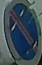

0e9e0890-0c54-46eb-a6df-2473f0318061.png             tensor(3.9016, device='cuda:0')    tensor([72, 91, 73, 85, 87], device='cuda:0')
0e9e0890-0c54-46eb-a6df-2473f0318061.png             tensor(1.0477, device='cuda:0')    tensor([91, 85, 72, 73, 74], device='cuda:0')


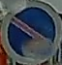

0cf72ca4-e581-4f51-a83f-70419d0a78eb.png             tensor(0.2039, device='cuda:0')    tensor([91, 72, 85, 73, 87], device='cuda:0')
0cf72ca4-e581-4f51-a83f-70419d0a78eb.png             tensor(3.4019, device='cuda:0')    tensor([72, 91, 87, 92, 85], device='cuda:0')


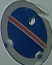

6f94027d-0e8b-4a55-9325-3c2cd52d7403.png             tensor(1.5864, device='cuda:0')    tensor([ 77, 176,  79, 180, 181], device='cuda:0')
6f94027d-0e8b-4a55-9325-3c2cd52d7403.png             tensor(1.1387, device='cuda:0')    tensor([ 77,  44,  54,  79, 176], device='cuda:0')


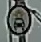

c00ab8c3-f31a-4131-a1d9-396698c5ed90.png             tensor(6.6451, device='cuda:0')    tensor([91, 85, 72, 87, 92], device='cuda:0')
c00ab8c3-f31a-4131-a1d9-396698c5ed90.png             tensor(0.5752, device='cuda:0')    tensor([85, 91, 92, 73, 87], device='cuda:0')


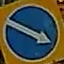

63a1b3d5-9705-44cd-9914-7b99e4cc698e.png             tensor(5.0360, device='cuda:0')    tensor([91, 85, 99, 72, 73], device='cuda:0')
63a1b3d5-9705-44cd-9914-7b99e4cc698e.png             tensor(0.2308, device='cuda:0')    tensor([85, 91, 92, 73, 99], device='cuda:0')


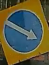

bbbd9cff-7d54-45c7-8218-67c9ccf44e56.png             tensor(6.3651, device='cuda:0')    tensor([91, 85, 87, 72, 92], device='cuda:0')
bbbd9cff-7d54-45c7-8218-67c9ccf44e56.png             tensor(1.5840, device='cuda:0')    tensor([85, 91, 92, 73, 87], device='cuda:0')


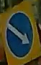

b14c67bc-23c4-4053-a5ca-6aa311b8905a.png             tensor(0.5058, device='cuda:0')    tensor([91, 72, 85, 73, 71], device='cuda:0')
b14c67bc-23c4-4053-a5ca-6aa311b8905a.png             tensor(5.6121, device='cuda:0')    tensor([91, 85, 74, 73, 72], device='cuda:0')


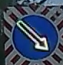

9e954a19-484b-498f-ad13-002c6c190262.png             tensor(3.8261, device='cuda:0')    tensor([92, 87, 91, 85, 93], device='cuda:0')
9e954a19-484b-498f-ad13-002c6c190262.png             tensor(0.1479, device='cuda:0')    tensor([87, 92, 85, 80, 91], device='cuda:0')


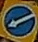

891098b0-3835-4f07-bb9f-1a9e786c8855.png             tensor(4.9034, device='cuda:0')    tensor([92, 87, 91, 93, 85], device='cuda:0')
891098b0-3835-4f07-bb9f-1a9e786c8855.png             tensor(1.0043, device='cuda:0')    tensor([92, 87, 85, 80, 75], device='cuda:0')


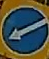

29fd0412-0265-446d-94d4-05170359a671.png             tensor(2.3174, device='cuda:0')    tensor([108, 127, 181,  34,  35], device='cuda:0')
29fd0412-0265-446d-94d4-05170359a671.png             tensor(4.4590, device='cuda:0')    tensor([127, 108, 132,  34, 181], device='cuda:0')


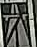

d5aa198b-a1c3-48ba-8b29-d724a9c32f09.png             tensor(2.1859, device='cuda:0')    tensor([169, 170, 179, 172, 151], device='cuda:0')
d5aa198b-a1c3-48ba-8b29-d724a9c32f09.png             tensor(1.1186, device='cuda:0')    tensor([170, 169, 124, 178, 173], device='cuda:0')


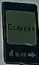

ebc7f9ef-7b4d-4a1e-9dd6-52cd5751a863.png             tensor(3.5688, device='cuda:0')    tensor([169, 172, 170, 179, 123], device='cuda:0')
ebc7f9ef-7b4d-4a1e-9dd6-52cd5751a863.png             tensor(1.1524, device='cuda:0')    tensor([172, 169,  24, 173, 178], device='cuda:0')


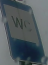

740be017-fb97-4712-9973-201ec9be2208.png             tensor(2.9189, device='cuda:0')    tensor([169, 172, 170, 179, 123], device='cuda:0')
740be017-fb97-4712-9973-201ec9be2208.png             tensor(0.3012, device='cuda:0')    tensor([172, 169,  24, 173, 178], device='cuda:0')


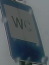

3ca21f13-1ea0-4bc7-9908-f1a701f00747.png             tensor(7.9459, device='cuda:0')    tensor([101, 100,  99,  71,  96], device='cuda:0')
3ca21f13-1ea0-4bc7-9908-f1a701f00747.png             tensor(0.8516, device='cuda:0')    tensor([101,  99, 100,  87,  90], device='cuda:0')


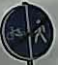

1a4c0f99-78fc-44d7-bf68-7143ee561f2f.png             tensor(6.1669, device='cuda:0')    tensor([149,  40, 148, 168, 114], device='cuda:0')
1a4c0f99-78fc-44d7-bf68-7143ee561f2f.png             tensor(1.5031, device='cuda:0')    tensor([149, 148, 117, 120,  40], device='cuda:0')


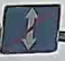

b306d85d-0a00-4463-ac65-57481d990462.png             tensor(0.1123, device='cuda:0')    tensor([102, 106, 107, 104, 105], device='cuda:0')
b306d85d-0a00-4463-ac65-57481d990462.png             tensor(0.9864, device='cuda:0')    tensor([106, 102, 107, 105, 104], device='cuda:0')


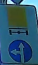

e58810b8-e2d4-4ab3-8ca1-70ce15082ea2.png             tensor(2.3406, device='cuda:0')    tensor([117, 120, 119, 118, 122], device='cuda:0')
e58810b8-e2d4-4ab3-8ca1-70ce15082ea2.png             tensor(1.2089, device='cuda:0')    tensor([117,  83, 119, 120, 118], device='cuda:0')


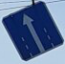

fb87bb41-6b5c-4d7e-91fa-e0d0dcba18d3.png             tensor(6.1451, device='cuda:0')    tensor([118, 120, 119, 117,   1], device='cuda:0')
fb87bb41-6b5c-4d7e-91fa-e0d0dcba18d3.png             tensor(0.5194, device='cuda:0')    tensor([118, 160, 120,  84,  86], device='cuda:0')


3fa610bc-7a51-441d-9aed-6cd46246645c.png             tensor(4.1662, device='cuda:0')    tensor([118, 120, 161,  84, 119], device='cuda:0')
3fa610bc-7a51-441d-9aed-6cd46246645c.png             tensor(1.5806, device='cuda:0')    tensor([118,  84, 122, 146, 164], device='cuda:0')


90e85b28-bcda-40d8-a36f-18688d9cd953.png             tensor(8.0412, device='cuda:0')    tensor([118, 120,  84, 161,   1], device='cuda:0')
90e85b28-bcda-40d8-a36f-18688d9cd953.png             tensor(1.8427, device='cuda:0')    tensor([118,  84, 122, 160, 120], device='cuda:0')


d17b7d01-7f93-42bc-9073-483af6f93d49.png             tensor(2.3218, device='cuda:0')    tensor([117, 119, 120, 118, 122], device='cuda:0')
d17b7d01-7f93-42bc-9073-483af6f93d49.png             tensor(1.7299, device='cuda:0')    tensor([117, 118, 120, 119, 160], device='cuda:0')


158


In [7]:
generate_submit(model, model2, test_loader, 'third', visual=True)